## [실습]
- 평균 수익률, 리스크 비교
- 정규화해서 비교
- 지수별 상관관계 비교 & 시각화
- 가격, 수익률 분포 확인
- 월별 수익률 분포 확인
- 등등...

In [ ]:
# 코스피, 코스닥(우리나라 큰 시장, 작은 시장)
# 나스닥, snp500(미국 큰 시장, 작은 시장)
# 금가격
# 비트코인 > 가상화폐

# 아래 질문들을 답하기 위해 위에 정보들을 분석!
# 어떤 지수가 포트폴리오 효과가 좋을까?
# 어떤 지수가 미래에 좋은 성과를 낼 것인가? & 어떤 지수가 가장 risk한가?

In [2]:
!pip install finance-datareader

In [3]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr

In [26]:
KOSPI = fdr.DataReader('KS11', '2016')[['Close']].rename(columns = {'Close':'KOSPI'})
NASDAQ = fdr.DataReader('IXIC', '2016')[['Close']].rename(columns = {'Close':'NASDAQ'})
SnP500 = fdr.DataReader('US500', '2016')[['Close']].rename(columns = {'Close':'SnP500'})
GOLD = fdr.DataReader('ZG', '2016')[['Close']].rename(columns = {'Close':'Gold'}) # 금선물
BTC = fdr.DataReader('BTC/KRW', '2016')[['Close']].rename(columns = {'Close':'BTC/KRW'}) # 비트코인

In [27]:
stocks = pd.concat([KOSPI, NASDAQ, SnP500, GOLD, BTC], axis = 1).dropna() # dropna 하기 > 비트코인은 쉬는날이 없음..
stocks.head()

,KOSPI,NASDAQ,SnP500,Gold,BTC/KRW
Date,,,,,
2016-01-04,1918.760010,4903.089844,2012.660034,24.510000,514646.37500
2016-01-05,1930.530029,4891.430176,2016.709961,24.040001,513928.71875
2016-01-06,1925.430054,4835.759766,1990.260010,23.879999,514823.03125
2016-01-07,1904.329956,4689.430176,1943.089966,23.020000,548100.25000
2016-01-08,1917.619995,4643.629883,1922.030029,23.889999,547021.43750


### 수익률

In [28]:
# 수익률
returns = stocks.pct_change() * 100
returns.tail()

,KOSPI,NASDAQ,SnP500,Gold,BTC/KRW
Date,,,,,
2023-02-07,0.554511,1.904023,1.287251,3.317435,1.740806
2023-02-08,1.302354,-1.678009,-1.108072,-3.672756,-0.992518
2023-02-09,-0.085353,-1.015400,-0.882980,-2.671228,-4.578089
2023-02-10,-0.475114,-0.606128,0.219526,-0.961764,-0.528862
2023-02-13,-0.689550,1.482063,1.144861,4.571295,1.147760


<AxesSubplot: ylabel='Frequency'>

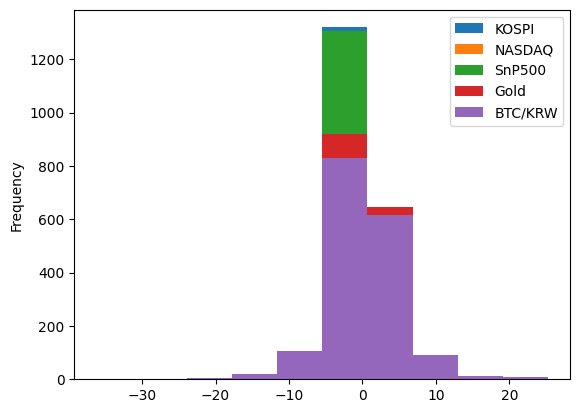

In [29]:
returns.plot.hist()

In [30]:
# 월별 수익률
monthly_price = stocks.resample('MS').last()
monthly_return_rate = monthly_price.pct_change() * 100
monthly_return_rate.tail()

,KOSPI,NASDAQ,SnP500,Gold,BTC/KRW
Date,,,,,
2022-10-01,6.407829,3.900767,7.986341,8.033535,4.409180
2022-11-01,7.800799,4.366973,5.375289,20.918209,-23.242612
2022-12-01,-9.550142,-8.631934,-5.657447,-16.844924,-6.457485
2023-01-01,8.436782,10.559749,5.905522,38.135045,35.938451
2023-02-01,1.138926,2.652155,1.488739,2.770026,-2.637815


<AxesSubplot: xlabel='variable', ylabel='value'>

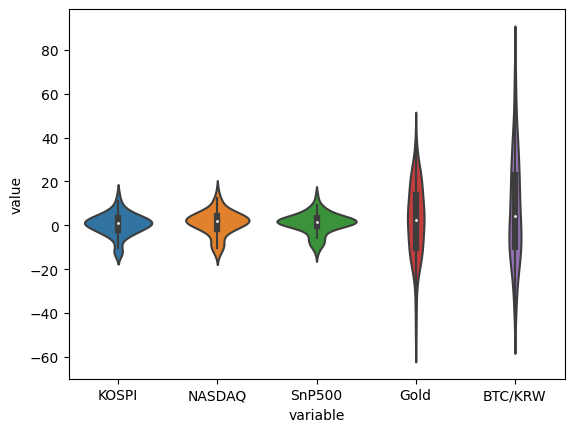

In [31]:
import seaborn as sns
melt_monthly_return_rate = monthly_return_rate.reset_index().melt(id_vars=['Date'])
sns.violinplot(data=melt_monthly_return_rate,x="variable",y='value')

- 확실히 비트코인 변동성이 굉장히 큰 것 같다..

In [32]:
# return
연평균수익률 = returns.mean() * 252
# risk
연표준편차 = returns.std() * 252
return_risk = pd.concat([연평균수익률, 연표준편차], axis = 1)
return_risk.columns = ['Return', 'Risk']
return_risk

,Return,Risk
KOSPI,5.158279,274.221586
NASDAQ,15.930139,368.139939
SnP500,12.710710,312.899683
Gold,25.515135,914.538667
BTC/KRW,87.074873,1174.540679


In [ ]:
# return / risk >> risk 대비 기대수익률 >> 이것도 보면 좋을듯!(준호오빠 코드)

In [33]:
melt_return_risk = return_risk.reset_index().melt(id_vars = 'index')
melt_return_risk.head()

,index,variable,value
0,KOSPI,Return,5.158279
1,NASDAQ,Return,15.930139
2,SnP500,Return,12.710710
3,Gold,Return,25.515135
4,BTC/KRW,Return,87.074873


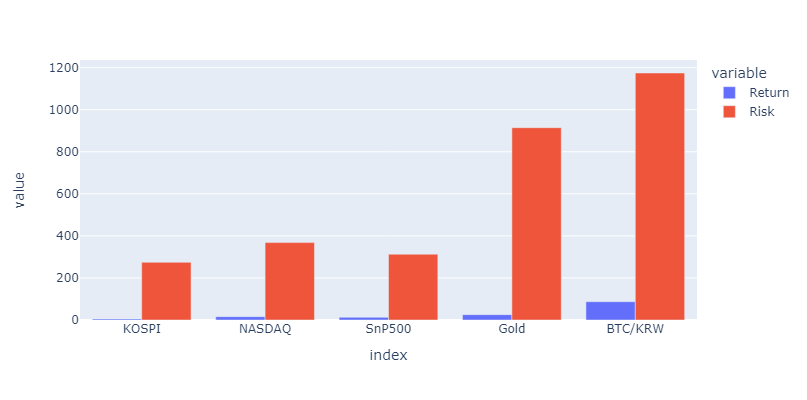

In [34]:
import plotly.express as px
fig = px.bar(melt_return_risk, x='index', y='value',
             color='variable', barmode='group',
             height=400)
fig.show()

- high risk...high return... 비트코인 ㄷㄷ...

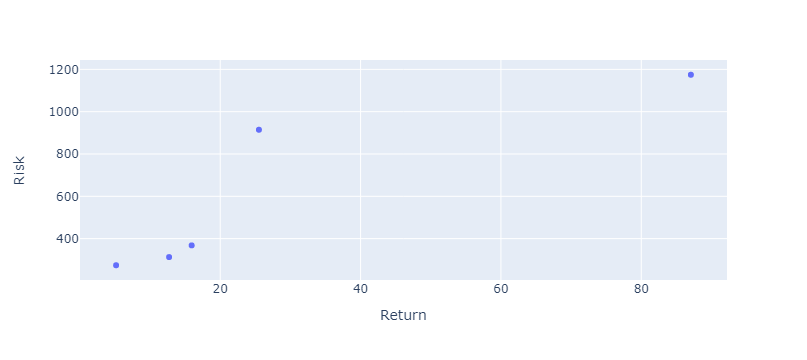

In [35]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(return_risk, x=return_risk.Return, y=return_risk.Risk
                 , hover_data=[return_risk.index])
fig.show()

In [36]:
return_rate = returns/100
cum_returns = (return_rate + 1).cumprod() -1
cum_returns.tail()

,KOSPI,NASDAQ,SnP500,Gold,BTC/KRW
Date,,,,,
2023-02-07,0.277757,1.470644,1.068904,0.855161,55.763190
2023-02-08,0.294398,1.429186,1.045979,0.787026,55.199805
2023-02-09,0.293294,1.404521,1.027913,0.739290,52.626928
2023-02-10,0.287149,1.389946,1.032365,0.722562,52.343316
2023-02-13,0.278273,1.425367,1.055633,0.801306,52.955569


<AxesSubplot: xlabel='Date'>

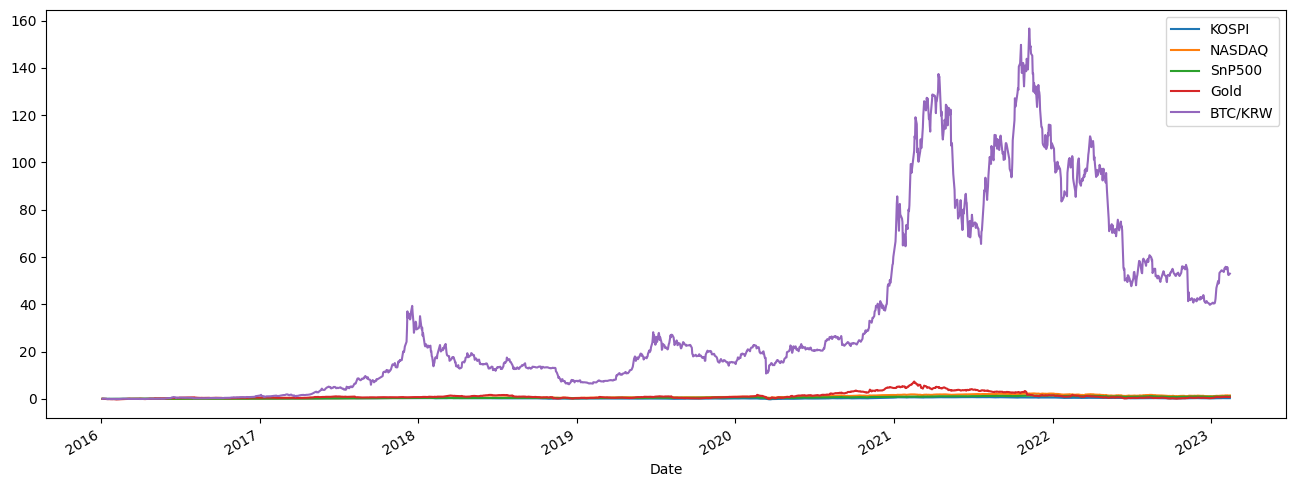

In [37]:
cum_returns.plot(figsize = (16,6)) 

- 비트코인 변동성이 다른거에 비해 정말 크다는 것을 알 수 있다.

### 지수별 상관계수

In [38]:
return_rate.corr().style.background_gradient(cmap='coolwarm')

,KOSPI,NASDAQ,SnP500,Gold,BTC/KRW
KOSPI,1.000000,0.215142,0.258232,0.172617,-0.022483
NASDAQ,0.215142,1.000000,0.945954,0.538335,0.188016
SnP500,0.258232,0.945954,1.000000,0.476618,0.169779
Gold,0.172617,0.538335,0.476618,1.000000,0.132179
BTC/KRW,-0.022483,0.188016,0.169779,0.132179,1.000000


포트폴리오
- 비추천 종목 조합: NASDAQ & SnP500
- 추천 종목 조합: 상관계수로 봤을때는 `비트코인`이 깡패지만.. 변동성이 큰 시장인만큼 조심해야할 것 같다

<AxesSubplot: xlabel='NASDAQ', ylabel='SnP500'>

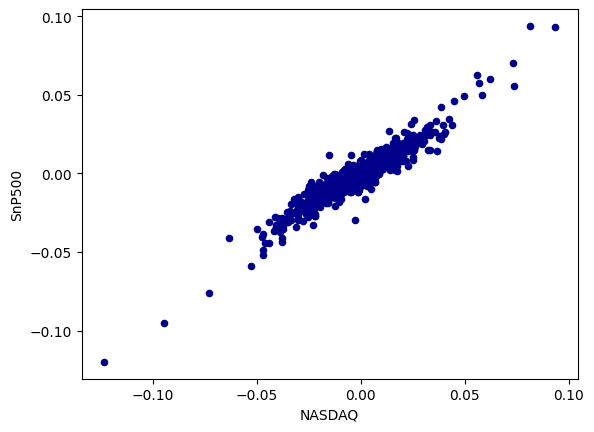

In [39]:
# NASDAQ & SnP500
return_rate.plot.scatter(x='NASDAQ', y='SnP500', c='DarkBlue')

<AxesSubplot: xlabel='BTC/KRW', ylabel='KOSPI'>

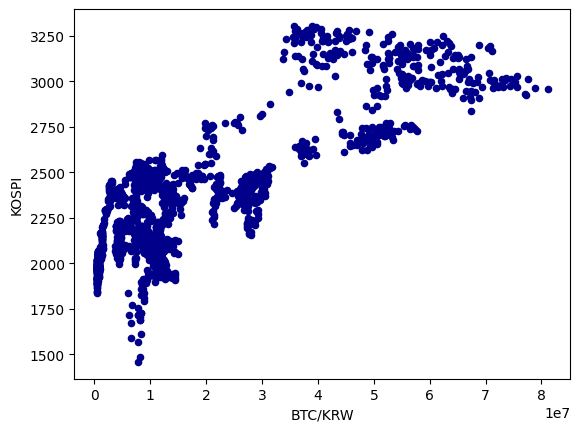

In [40]:
stocks.plot.scatter(x='BTC/KRW', y='KOSPI', c='DarkBlue')

array([[<AxesSubplot: xlabel='KOSPI', ylabel='KOSPI'>,
        <AxesSubplot: xlabel='NASDAQ', ylabel='KOSPI'>,
        <AxesSubplot: xlabel='SnP500', ylabel='KOSPI'>,
        <AxesSubplot: xlabel='Gold', ylabel='KOSPI'>,
        <AxesSubplot: xlabel='BTC/KRW', ylabel='KOSPI'>],
       [<AxesSubplot: xlabel='KOSPI', ylabel='NASDAQ'>,
        <AxesSubplot: xlabel='NASDAQ', ylabel='NASDAQ'>,
        <AxesSubplot: xlabel='SnP500', ylabel='NASDAQ'>,
        <AxesSubplot: xlabel='Gold', ylabel='NASDAQ'>,
        <AxesSubplot: xlabel='BTC/KRW', ylabel='NASDAQ'>],
       [<AxesSubplot: xlabel='KOSPI', ylabel='SnP500'>,
        <AxesSubplot: xlabel='NASDAQ', ylabel='SnP500'>,
        <AxesSubplot: xlabel='SnP500', ylabel='SnP500'>,
        <AxesSubplot: xlabel='Gold', ylabel='SnP500'>,
        <AxesSubplot: xlabel='BTC/KRW', ylabel='SnP500'>],
       [<AxesSubplot: xlabel='KOSPI', ylabel='Gold'>,
        <AxesSubplot: xlabel='NASDAQ', ylabel='Gold'>,
        <AxesSubplot: xlabel='SnP500', ylabe

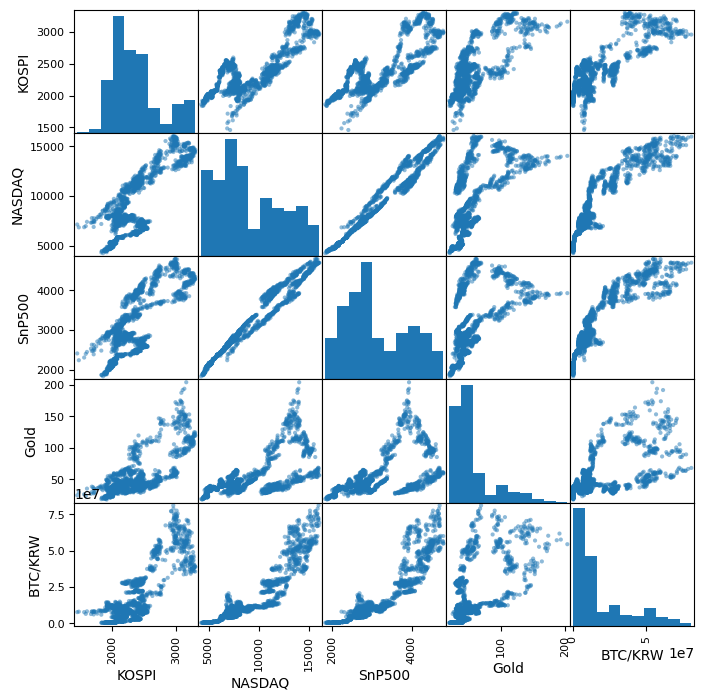

In [41]:
from pandas.plotting import scatter_matrix
scatter_matrix(stocks, figsize=(8,8)) 

- NASDAQ & SnP500 제외하고는 좀 분산된 그래프가 그려진다.

In [42]:
# 이동평균
stocks.rolling(5).mean().dropna()

,KOSPI,NASDAQ,SnP500,Gold,BTC/KRW
Date,,,,,
2016-01-08,1919.334009,4792.667969,1976.950000,23.868000,5.277040e+05
2016-01-11,1914.550000,4739.648047,1959.152002,23.718000,5.327669e+05
2016-01-12,1906.615991,4698.545996,1943.546021,23.635999,5.353772e+05
2016-01-13,1904.785986,4636.606055,1923.550024,23.460000,5.371709e+05
2016-01-14,1903.921997,4621.720020,1919.300024,23.383999,5.314594e+05
...,...,...,...,...,...
2023-02-07,2457.795947,12005.066211,4142.105957,44.889999,2.898864e+07
2023-02-08,2464.563916,12023.906055,4141.835937,44.889999,2.897385e+07
2023-02-09,2467.091943,11941.658008,4122.183984,44.188000,2.874185e+07


In [43]:
# 지수가중이동평균
# 최근 데이터에 좀 더 가중치를 주는 장점이 있었음
stocks.ewm(span=10).mean()

,KOSPI,NASDAQ,SnP500,Gold,BTC/KRW
Date,,,,,
2016-01-04,1918.760010,4903.089844,2012.660034,24.510000,5.146464e+05
2016-01-05,1925.233520,4896.677027,2014.887494,24.251501,5.142517e+05
2016-01-06,1925.312526,4872.188693,2004.987409,24.102159,5.144813e+05
2016-01-07,1918.399704,4811.977904,1984.594959,23.745636,5.255573e+05
2016-01-08,1918.175871,4763.649766,1966.634269,23.787079,5.317191e+05
...,...,...,...,...,...
2023-02-07,2442.239356,11746.327903,4093.823489,43.715508,2.828400e+07
2023-02-08,2449.766726,11776.180926,4098.193739,43.730870,2.840019e+07
2023-02-09,2455.540052,11778.617136,4095.158514,43.530712,2.825450e+07


In [44]:
SMA = stocks.rolling(100).mean().dropna()
EWMA = stocks.ewm(100).mean().dropna()

In [45]:
SMA

,KOSPI,NASDAQ,SnP500,Gold,BTC/KRW
Date,,,,,
2016-06-07,1951.176904,4726.562124,2006.773199,24.1405,5.093268e+05
2016-06-08,1952.260104,4727.277627,2007.837800,24.2238,5.108750e+05
2016-06-09,1953.196504,4727.949526,2008.825500,24.3102,5.123835e+05
2016-06-10,1954.118503,4728.537427,2009.883601,24.3960,5.139948e+05
2016-06-13,1954.865804,4730.127524,2011.243302,24.4920,5.167633e+05
...,...,...,...,...,...
2023-02-07,2347.502700,11023.442930,3882.229612,34.6668,2.532786e+07
2023-02-08,2348.238899,11027.099023,3884.326311,34.7697,2.535741e+07
2023-02-09,2349.289499,11027.075820,3885.342610,34.8426,2.536822e+07


<AxesSubplot: xlabel='Date'>

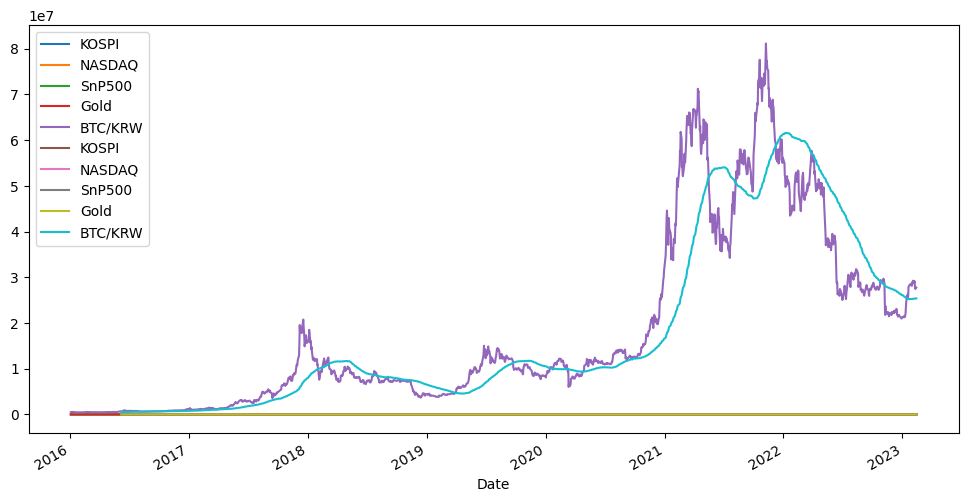

In [46]:
ax = stocks.plot(figsize=(12,6)) 
SMA.plot(figsize=(12,6), ax = ax) 

<AxesSubplot: xlabel='Date'>

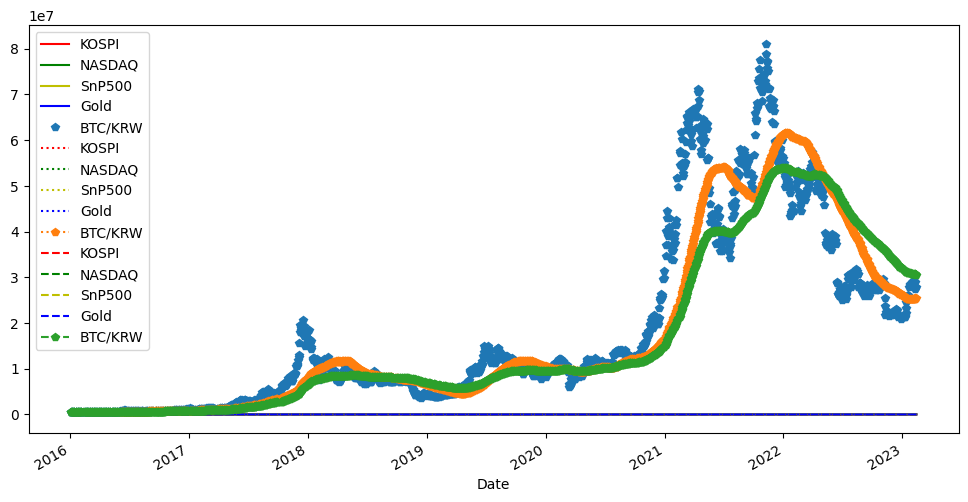

In [47]:
ax = stocks.plot(figsize=(12,6), style={'KOSPI':'r', 'NASDAQ':'g', 'SnP500':'y', 'Gold':'b', 'BTC/KRW':'p'})
SMA.plot(figsize=(12,6), ax = ax, style={'KOSPI':':r', 'NASDAQ':':g', 'SnP500':':y', 'Gold':':b', 'BTC/KRW':':p'}) 
EWMA.plot(figsize=(12,6), ax = ax, style={'KOSPI':'--r', 'NASDAQ':'--g', 'SnP500':'--y', 'Gold':'--b', 'BTC/KRW':'--p'}) 